VIEWING MY DATASET

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


SHAPE OF DATA

In [367]:
df.shape


(1338, 7)

DATA TYPES OF DATA

In [368]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


NUMERICAL DESCRIPTION OF DATA

In [369]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


DUPLICATED ROWS

In [370]:
df.duplicated().sum()


1

DROPPING DUPLOCATED ROWS

In [371]:
df.drop_duplicates(inplace=True)


CHECKING FOR NULL ROWS

In [372]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

EXPLORATORY DATA ANALYSIS

GETTING THE PERCENTAGE OF CATEGORICAL COLUMNS

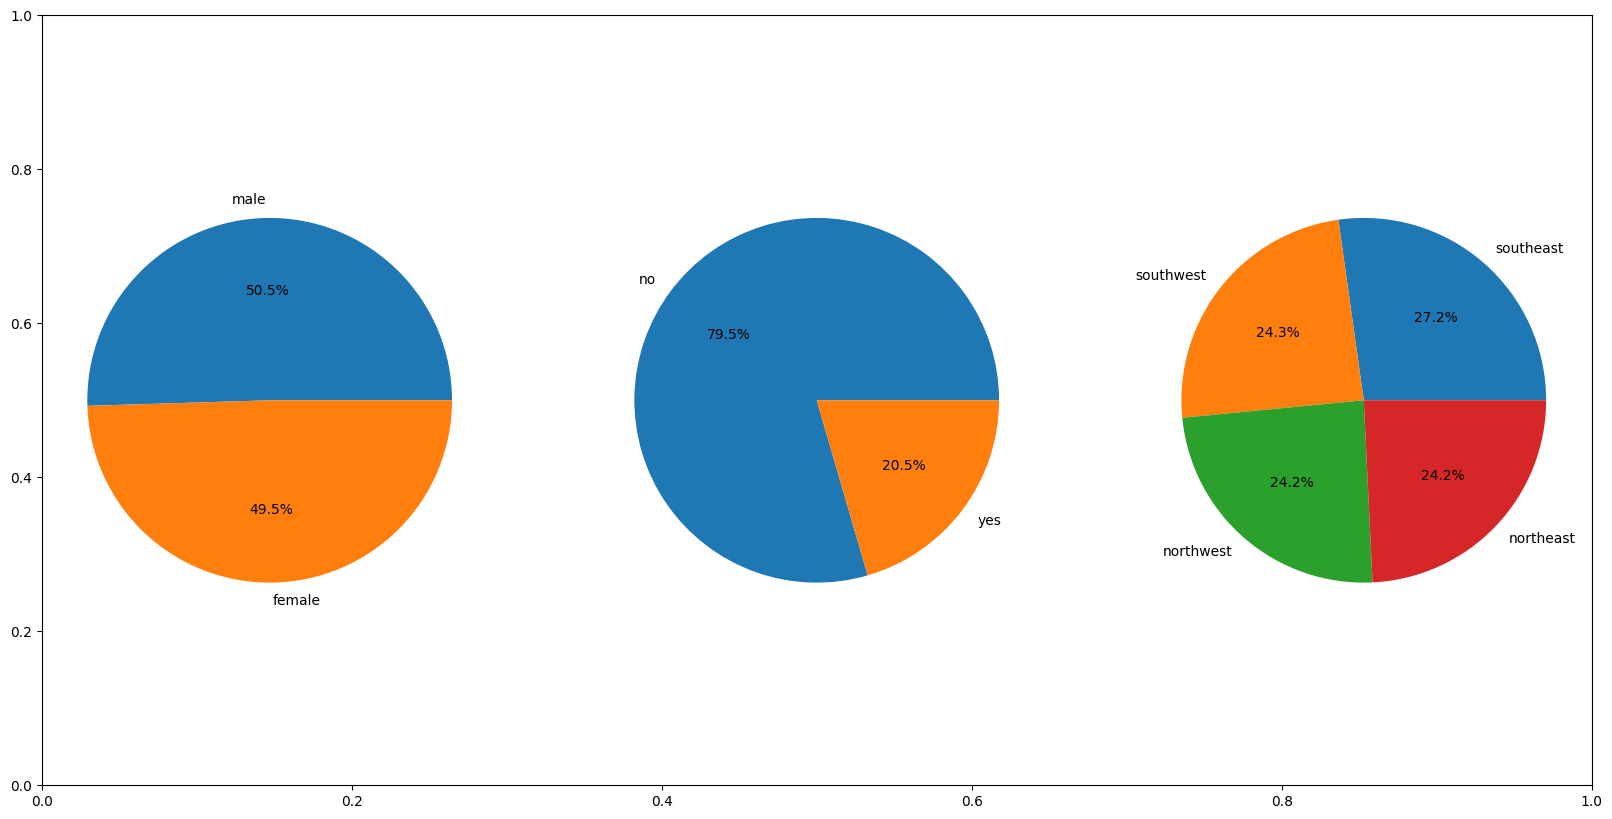

In [373]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
 plt.subplot(1, 3, i + 1)

 x = df[col].value_counts()
 plt.pie(x.values, labels=x.index, autopct = '%1.1f%%')
plt.show()


AVERAGE NUMBER OF CHARGES WITH FEATURES

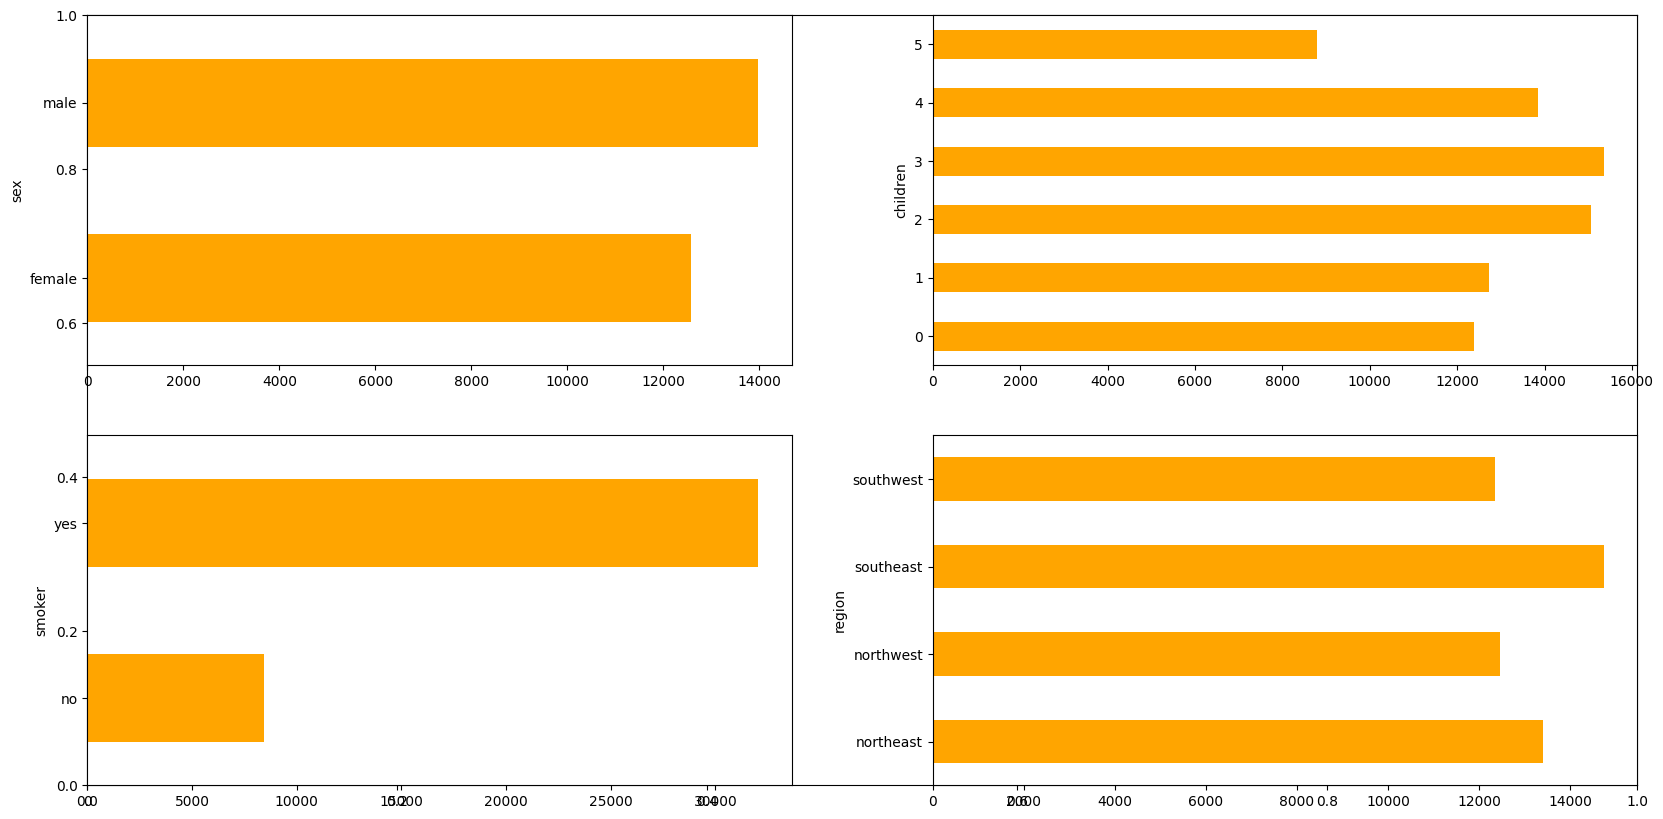

In [374]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.barh(color='orange')
plt.show()


FEATURES WITH LINEAR RELATIONSHIP

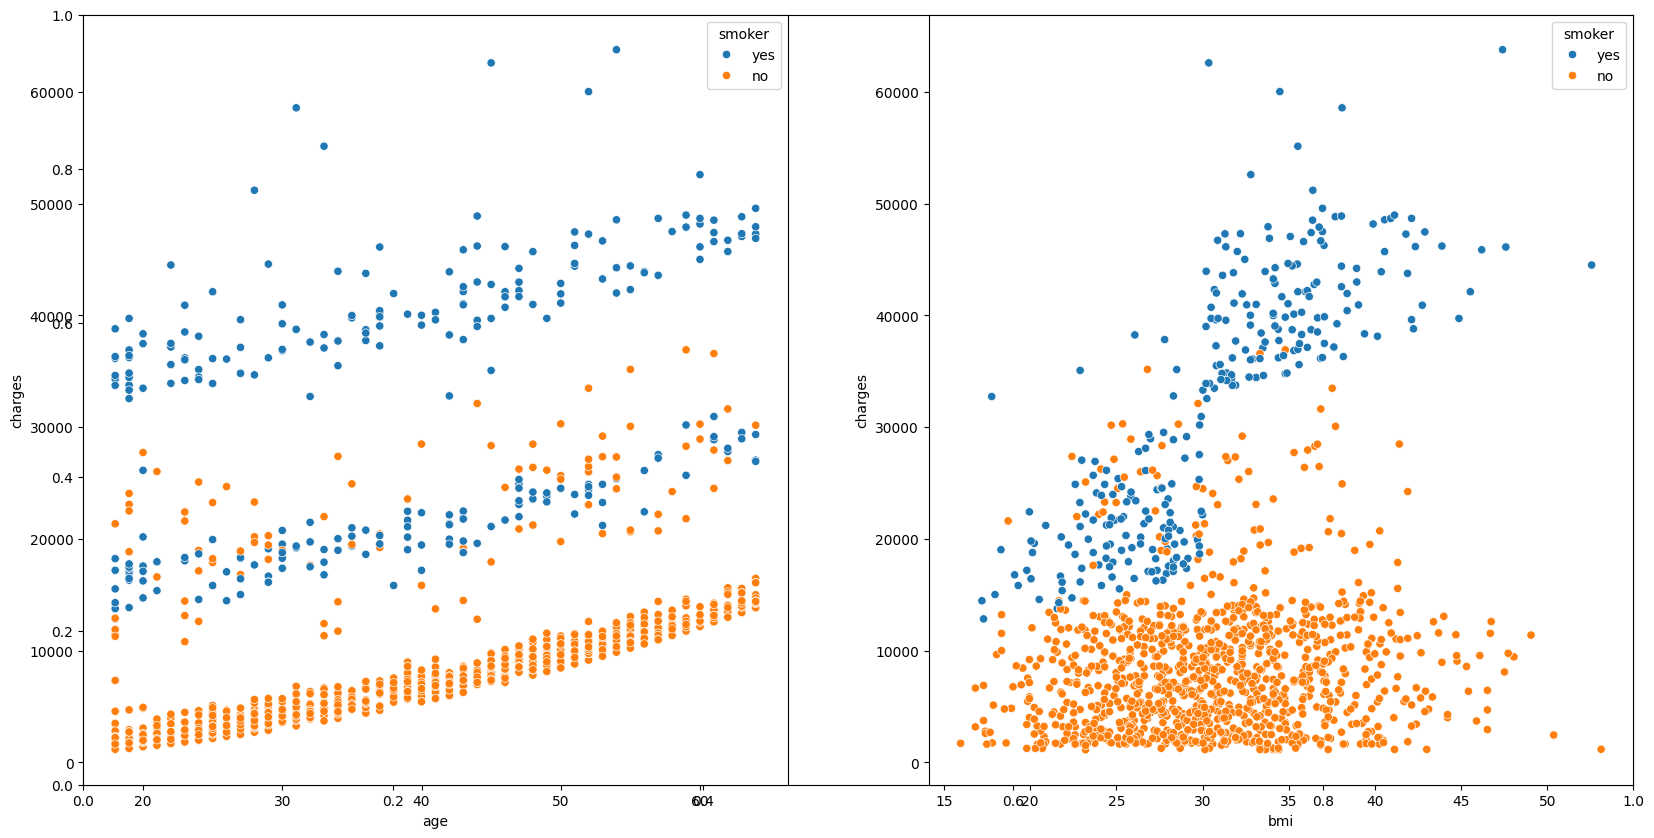

In [375]:
features = ['age', 'bmi']
plt.subplots(figsize = (20, 10))

for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)

    sns.scatterplot(data=df, x = col, y = 'charges', hue = 'smoker')
plt.show()


COUNT OF FEATURES 

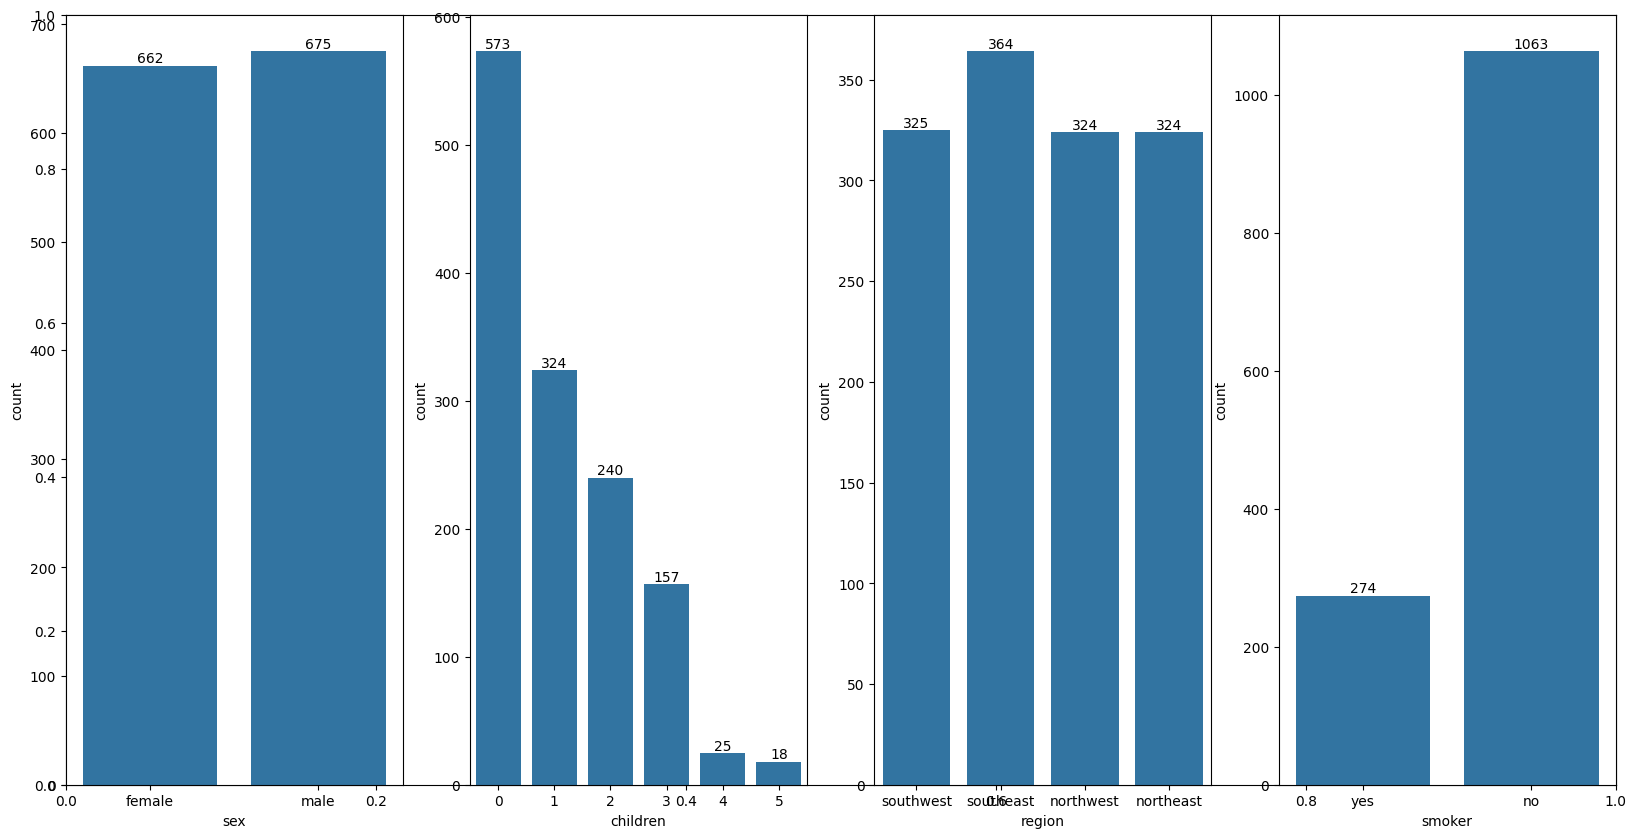

In [376]:
features = ['sex', 'children','region', 'smoker']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)

    graph = sns.countplot(x = col, data = df)
    for x in graph.containers:
        graph.bar_label(x) 
plt.show()


REMOVING OF OUTLIERS

In [377]:

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('the shape of dataset before outlier removal :', df.shape)


8.410000000000004
the shape of dataset before outlier removal : (1337, 7)


In [378]:
df = df[~((df['bmi'] < (Q1 - 1.5*IQR)) | (df['bmi'] > (Q3 + 1.5*IQR)))]
print('the shape of dataset after removal', df.shape)


the shape of dataset after removal (1328, 7)


SHOWING OUTLIERS

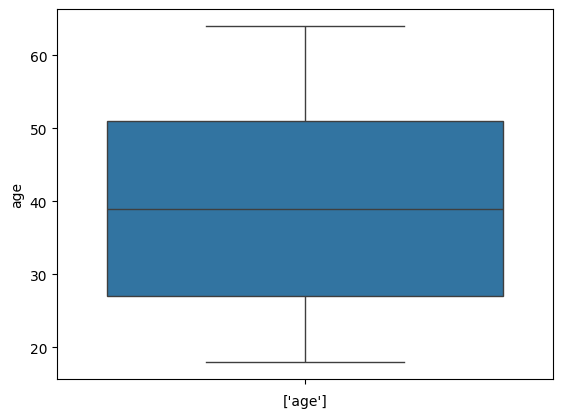

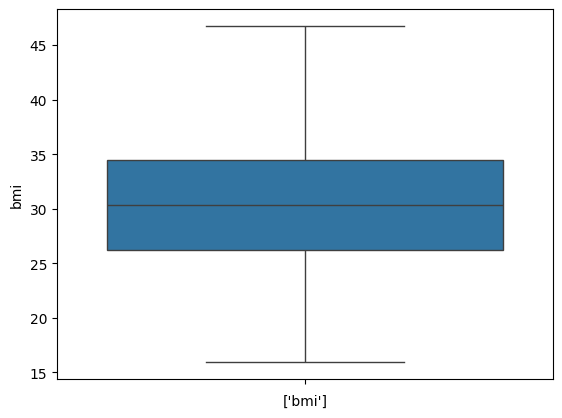

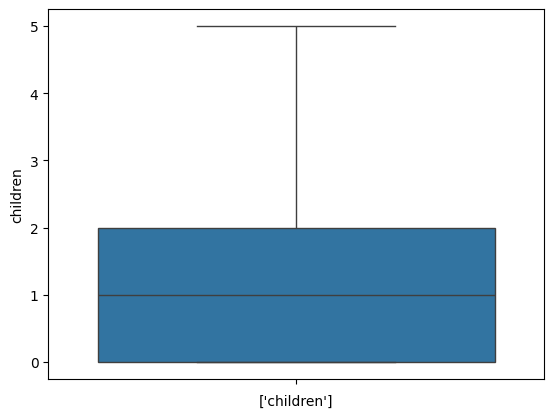

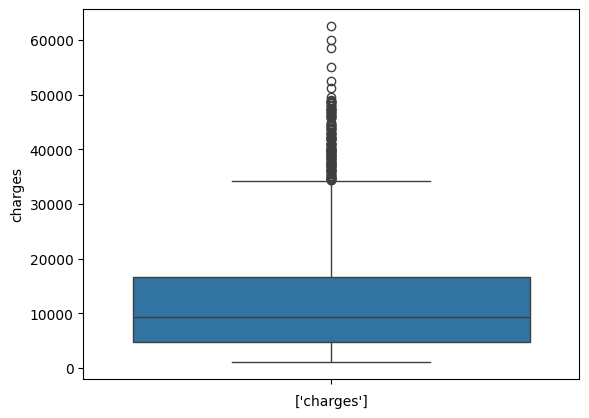

In [379]:
for col in df:
      if df[col].dtype != "O":
        sns.boxplot(df[col])
        plt.xlabel([col])
        plt.show()


SHOWING DISTRIBUTION USING HISTPLOT

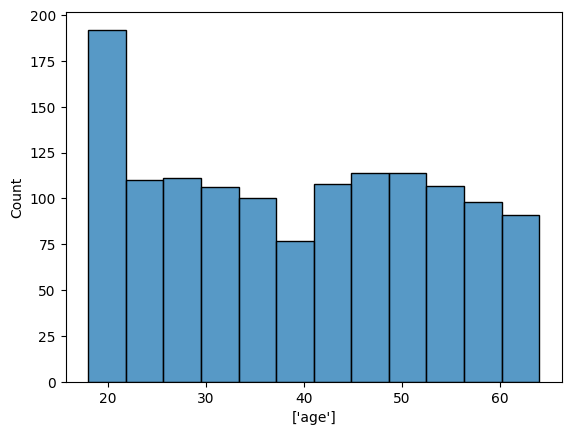

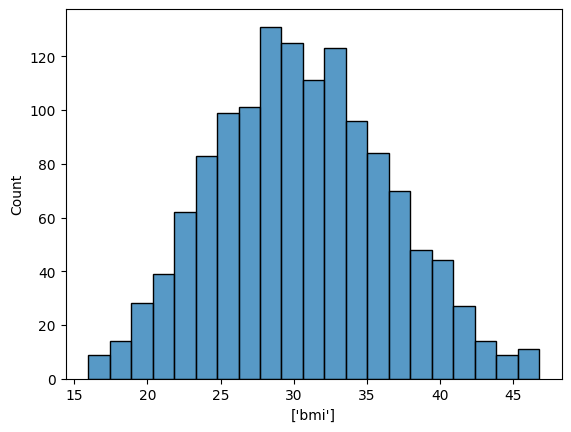

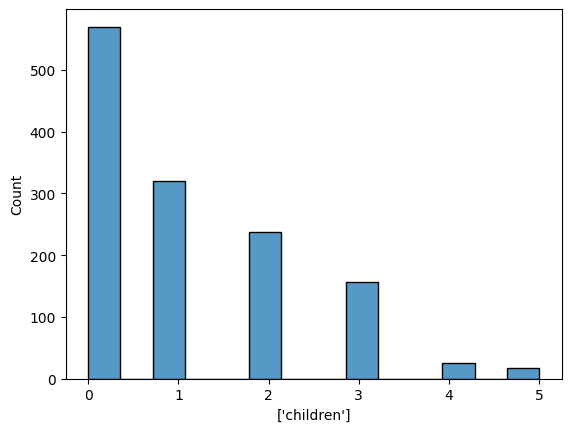

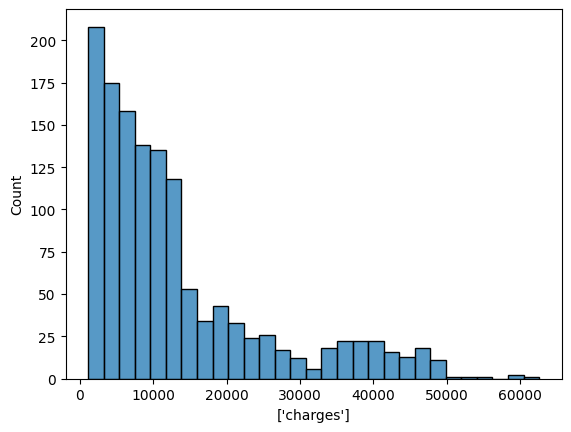

In [380]:
for col in df:
      if df[col].dtype != "O":
        sns.histplot(df[col])
        plt.xlabel([col])
        plt.show()


MAPPING CATEGORICAL COLUMNS

In [381]:
df['sex'] = df['sex'].map({'male' : 0, 'female' : 1})
df['smoker'] = df['smoker'].map({'yes' : 1, 'no' : 0})
df['region'] = df['region'].map({'northwest' : 0, 'northeast' : 1, 'southeast' : 2, 'southwest' : 3})


In [382]:
df.head(20)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,0,7281.50560
8,37,0,29.830,2,0,1,6406.41070
9,60,1,25.840,0,0,0,28923.13692


SHOWING CORRELATION

<Axes: >

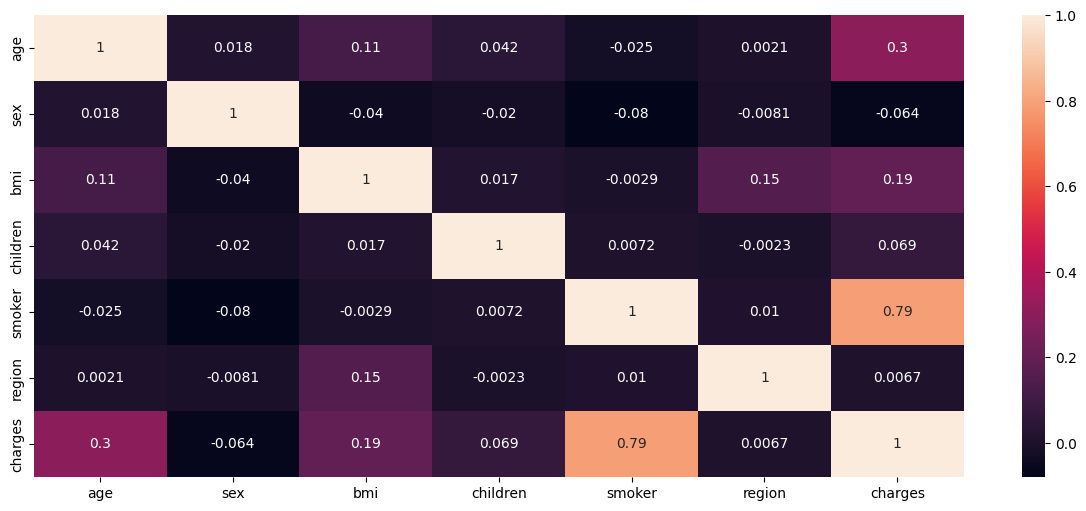

In [383]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot = True)


CHECKING FOR MODEL WITH BEST TRAINING AND TESTING ACCURACY
USING LINEAR REGRESSION

In [384]:
#IMPORTING MY LIBRARIES

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


LINEAR REGRESSION PREDICTION ACCURACY

In [385]:
x = df.drop(['charges'], axis=1)    #dropping the charges features
y = df[['charges']]                 #assigning the target column to a variable



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
print('LinearRegression:')
print(lrmodel.score(x_train, y_train))
print(lrmodel.score(x_test, y_test))

print(cross_val_score(lrmodel, x, y,cv=5).mean())
    


LinearRegression:
0.7496982807448302
0.7465203897336329
0.7461707348366925


SUPPORT VECTOR REGRESSOR ACCURACY

In [386]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(x_train,y_train)
ypredtrain1 = svrmodel.predict(x_train)
ypredtest1 = svrmodel.predict(x_test)
print('SVR:')
print(r2_score(y_train, ypredtrain1))
print(r2_score(y_test, ypredtest1))
print(cross_val_score(svrmodel, x, y, cv=5).mean())


SVR:
-0.0996277492030504
-0.09639587001893446
-0.10436954907006273


RANDOM FOREST REGRESSOR ACCURACY WITH HYPER PARAMETER TUNNING

In [387]:
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(x_train, y_train)
ypredtrain2 = rfmodel.predict(x_train)
ypredtest2 = rfmodel.predict(x_test)
print('RandomForestRegressor:')
print(r2_score(y_train, ypredtrain2))
print(r2_score(y_test, ypredtest2))
print(cross_val_score(rfmodel, x, y, cv=5).mean())

#hyper parameter tunning

from sklearn.model_selection import GridSearchCV                        #importing the parameter tunning library


estimator = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators' : [10, 40, 50, 98, 100, 120, 150]}
grid = GridSearchCV(estimator, param_grid, scoring='r2', cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
rfmodel = RandomForestRegressor(random_state=42, n_estimators=150)
rfmodel.fit(x_train, y_train)
ypredtrain3 = rfmodel.predict(x_train)
ypredtest3 = rfmodel.predict(x_test)
print('Hyper parameter tunning')
print(r2_score(y_train, ypredtrain3))
print(r2_score(y_test, ypredtest3))
print(cross_val_score(rfmodel, x, y, cv=5).mean())


RandomForestRegressor:
0.9768220071614796
0.8095288365271456
0.8337600845903241
{'n_estimators': 150}
Hyper parameter tunning
0.9774432163114329
0.807646448205171
0.8339415702706974


GRADIENT BOOSTING REGRESSOR ACCURACY WITH HYPER PARAMETER TUNNING

In [388]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(x_train, y_train)
ypredtrain4 = gbmodel.predict(x_train)
ypredtest4 = gbmodel.predict(x_test)

print('GradientBoostingRegressor:')
print(r2_score(y_train, ypredtrain4))
print(r2_score(y_test, ypredtest4))
print(cross_val_score(gbmodel, x, y, cv=5).mean())

#hyper parameter tunning



from sklearn.model_selection import GridSearchCV                        #importing the parameter tunning library



estimator = GradientBoostingRegressor()
param_grid = {'n_estimators' : [10, 15, 19, 20, 21, 50], 'learning_rate' : [0.1, 0.19, 0.2, 0.21, 0.8, 1]}
grid = GridSearchCV(estimator, param_grid, scoring = 'r2', cv =5)
grid.fit(x_train, y_train)
print(grid.best_params_)
gbmodel = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1)
gbmodel.fit(x_train, y_train)
ypredtrain4 = gbmodel.predict(x_train)
ypredtest4 = gbmodel.predict(x_test)

print('GradientBoostingRegressor:')
print(r2_score(y_train, ypredtrain4))
print(r2_score(y_test, ypredtest4))
print(cross_val_score(gbmodel, x, y, cv=5).mean())


GradientBoostingRegressor:
0.9069725403280829
0.8385482315574518
0.8535094950424587
{'learning_rate': 0.1, 'n_estimators': 50}
GradientBoostingRegressor:
0.8900188665579571
0.8476952599887096
0.8585512830619753


XGBOOST REGRESSOR WITH HYPER PARAMETER TUNNING

XGBOOST HAS THE BEST TESTING ACCURACY AND THATS WHAT WE WILL USE FOR MY FINAL MODEL PREDICTION

In [389]:

xgbmodel = XGBRegressor()

xgbmodel.fit(x_train, y_train)
ypredtrain5 = xgbmodel.predict(x_train)
ypredtest5 = xgbmodel.predict(x_test)

print('XGBRegressor:')
print(r2_score(y_train, ypredtrain5))
print(r2_score(y_test, ypredtest5))
print(cross_val_score(xgbmodel, x, y, cv = 5).mean())


#hpyer parameter tunning

from sklearn.model_selection import GridSearchCV                     #importing the parameter tunning library

estimator = XGBRegressor()
param_grid = {'n_estimators' : [10, 15, 20, 40, 50],'max_depth' :[3, 4, 5], 'gamma': [0, 0.15, 0.3, 0.5, 1]}
grid = GridSearchCV(estimator, param_grid,scoring='r2', cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)
xgbmodel = XGBRegressor(n_estimators = 15,max_depth = 3, gamma = 0)
xgbmodel.fit(x_train, y_train)
ypredtrain5 = xgbmodel.predict(x_train)
ypredtest5 = xgbmodel.predict(x_test)

print('Hyper parameter tunning')
print(r2_score(y_train, ypredtrain5))
print(r2_score(y_test, ypredtest5))
print(cross_val_score(xgbmodel, x, y, cv=5).mean())


XGBRegressor:
0.9953563213348389
0.7960608601570129
0.8116013407707214
{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}
Hyper parameter tunning
0.8841079473495483
0.8545110821723938
0.8600259065628052


XGBOOST REGRESSOR PERFORMS THE BEST SO WE WILL USE IT FOR OUR FINAL MODEL 

SHOWING THE FEATURES  

In [390]:
best_feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_, index = x.columns, columns = ['Importance'])
best_feats


,Importance
age,0.046129
sex,0.006237
bmi,0.113405
children,0.013065
smoker,0.813756
region,0.007408


FEATURES WITH ABOVE 0.01 CORRELATION

In [391]:
important_feats = best_feats[best_feats['Importance'] > 0.01] 
important_feats


,Importance
age,0.046129
bmi,0.113405
children,0.013065
smoker,0.813756


OUR FINAL MODEL

In [392]:

xf = df.drop(df[['charges']], axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(xf, y, test_size=0.2, random_state=42)

finalmodel = XGBRegressor(n_estimators = 15,max_depth = 3, gamma = 0)
finalmodel.fit(x_train, y_train)
ypredtrain5 = xgbmodel.predict(x_train)
ypredtest5 = xgbmodel.predict(x_test)

print('Final Model')
print(r2_score(y_train, ypredtrain5))
print(r2_score(y_test, ypredtest5))
print(cross_val_score(xgbmodel, xf, y, cv=5).mean())


Final Model
0.8841079442015098
0.8545110710714489


0.8600259207797505


SAVING THE MODEL

In [393]:
from pickle import dump
dump(finalmodel, open('insurancemodelf.pkl', 'wb'))


TESTING THE MODEL ON A NEW DATA TO SEE PREDICTION

In [394]:
new_data = pd.DataFrame({'age':29, 'sex':1, 'bmi':30.9, 'children':0, 'smoker':1, 'region':1}, index=[0])



charges = finalmodel.predict(new_data)
print('New Data Charges:\n', charges)


New Data Charges:
 [37213.4]
